INFO:clients.binance_client:Cliente inicializado en modo público (solo lectura)
INFO:clients.binance_client:Obtenidos 500 datos para ETHUSDT (1m)
INFO:analysis.indicators:Calculando indicadores para ETHUSDT (500 velas)
INFO:analysis.indicators:Resistencias detectadas: 1
INFO:analysis.indicators:Soportes detectados: 1
INFO:analysis.indicators:Tendencia: BAJISTA
INFO:analysis.indicators:Volatilidad: 0.14%
INFO:analysis.indicators:Cambio total: -5.49%
INFO:visualization.chart_plotter:Generando gráfico para ETHUSDT



ANÁLISIS DE ETHUSDT
Precio actual: $3194.05
Tendencia: BAJISTA
Volatilidad: 0.14%
Cambio: -5.49%

Resistencias: 1 detectadas
Soportes: 1 detectados

Para LONG:
  Stop Loss: $3185.69
  Take Profit: $3210.76


C:\Users\Roger\workspace\trading\algo_trade_1\visualization\chart_plotter.py:369: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper left', fontsize=9, framealpha=0.9)


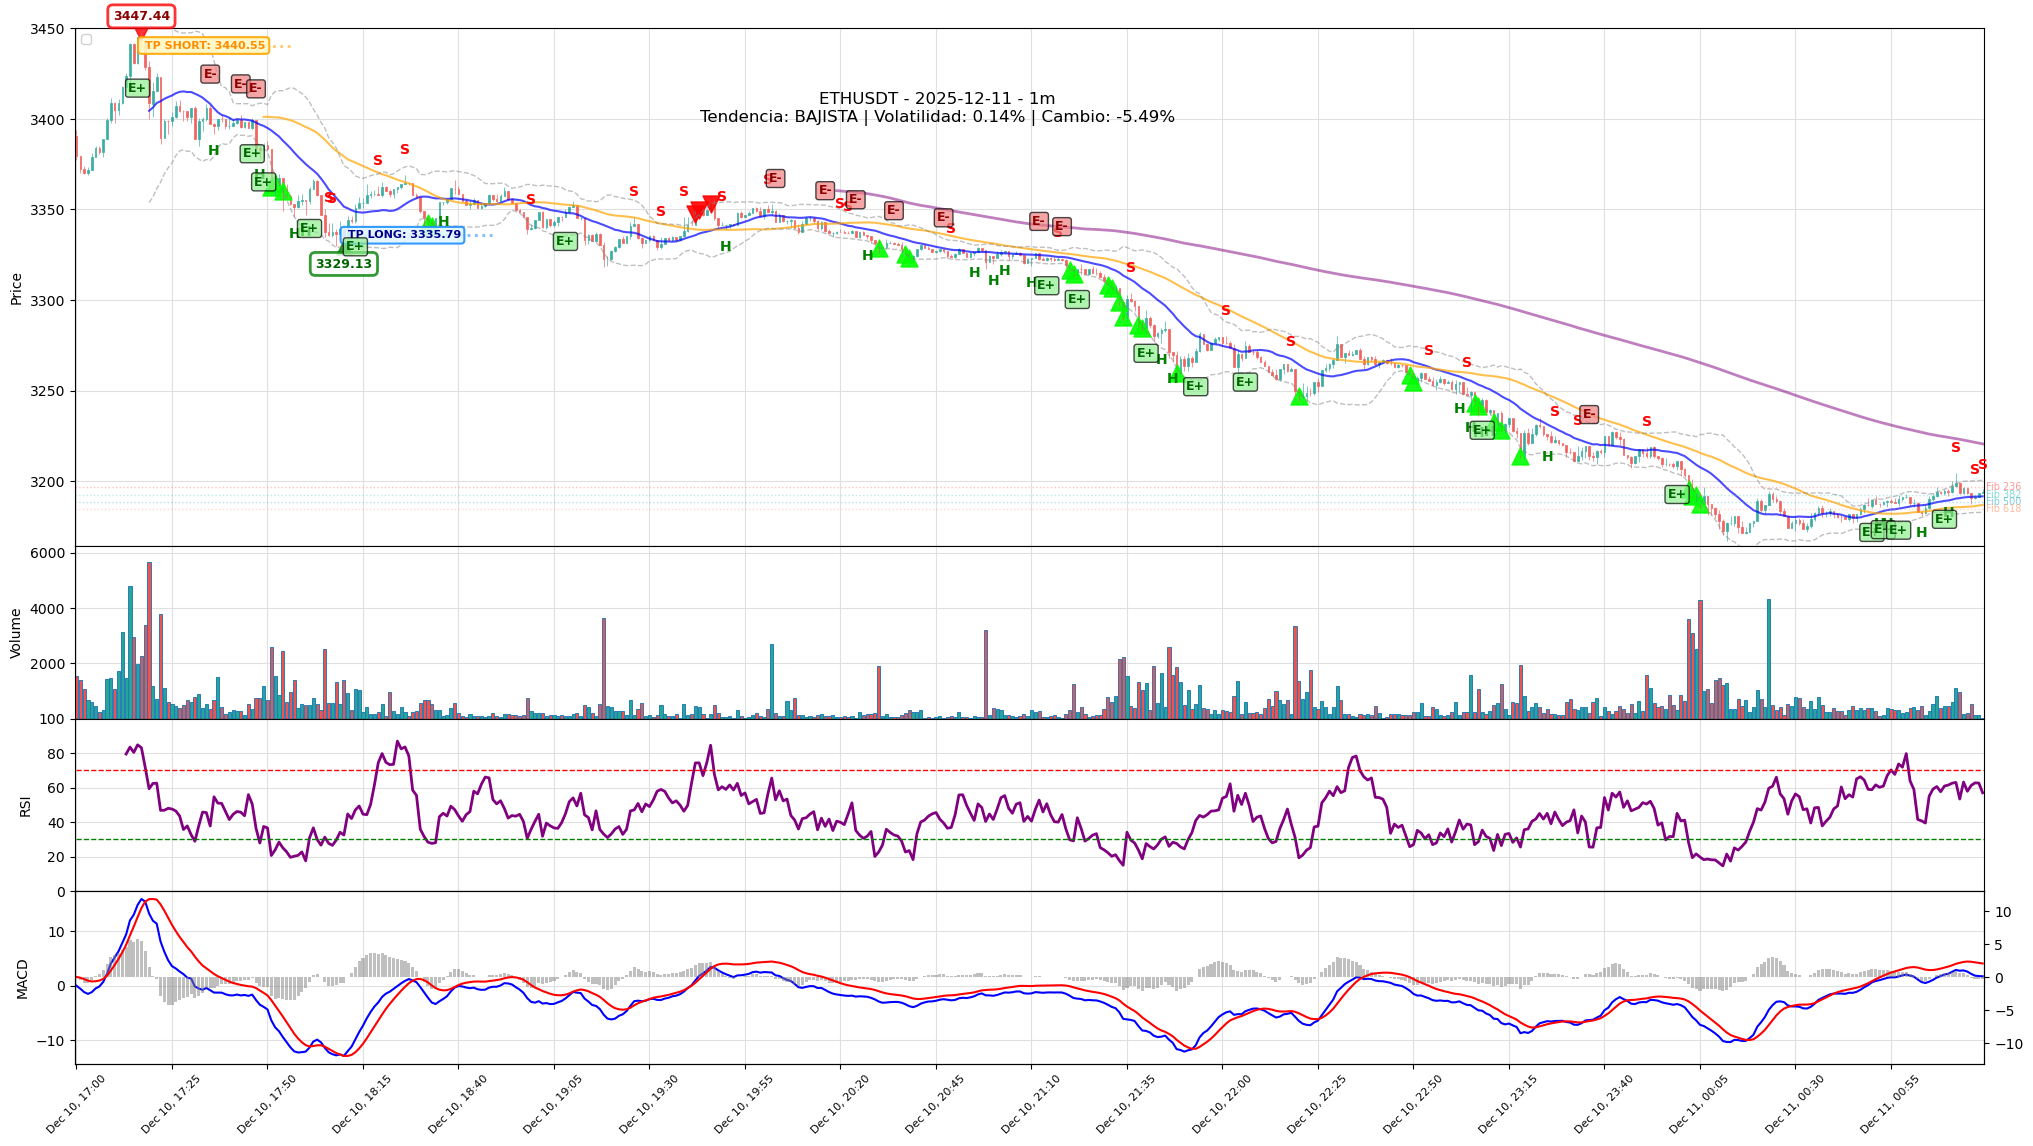

INFO:visualization.chart_plotter:Gráfico generado exitosamente


In [1]:
from clients.binance_client import BinanceClient
from analysis.indicators import calcular_indicadores
from visualization.chart_plotter import graficar_analisis

# Inicializar cliente
binance = BinanceClient()
symbol='ETHUSDT'
# Obtener datos
df = binance.history(symbol, '1m', 500)

# Calcular indicadores
fecha = df.index[-1].strftime('%Y-%m-%d')
comision = binance.calcular_comision(symbol)
datos = calcular_indicadores(symbol, fecha, '1m', df, comision)

dfX = datos['dfX']  # DataFrame con indicadores
dfX['senal'] = datos['dfX']['senal']  # o como tu lo uses

# aplicar smart exit
from analysis.risk_management import apply_smart_exit
df_with_exit = apply_smart_exit(dfX,
                                entry_col='senal',
                                price_col='close',
                                atr_col='ATR',
                                ema_short_col='EMA_12',
                                ema_long_col='EMA_26',
                                atr_mult=1.5,
                                min_move_to_update=0.5,
                                swing_lookback=5,
                                break_even_pct=0.9,
                                break_even_buffer_atr_mult=0.2)

# Ver resultados
print(f"\n{'='*50}")
print(f"ANÁLISIS DE {symbol}")
print(f"{'='*50}")
print(f"Precio actual: ${datos['precio_actual']:.2f}")
print(f"Tendencia: {datos['tendencia']}")
print(f"Volatilidad: {datos['volatilidad']:.2f}%")
print(f"Cambio: {datos['cambio_porcentual']:+.2f}%")
print(f"\nResistencias: {len(datos['resistance_levels'])} detectadas")
print(f"Soportes: {len(datos['support_levels'])} detectados")
print(f"\nPara LONG:")
print(f"  Stop Loss: ${datos['sl_long']:.2f}")
print(f"  Take Profit: ${datos['tp_long']:.2f}")

# Graficar
graficar_analisis(datos, mostrar_avanzado=True)